In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
from keras.models import load_model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, LeakyReLU, Flatten, Conv2D, Input
from keras.utils import Sequence
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard

In [2]:
Z_DIM = 100
BATCH_SIZE = 256
BATCHES= 100
EPOCHS = 100

In [3]:
encoder = Sequential(name="encoder")
encoder.add(Conv2D(64, (5, 5), strides=(2, 2), padding="same", input_shape=[28, 28, 1]))
encoder.add(LeakyReLU())
encoder.add(Dropout(0.3))
encoder.add(Conv2D(128, (5, 5), strides=(2, 2), padding="same"))
encoder.add(LeakyReLU())
encoder.add(Dropout(0.3))
encoder.add(Flatten())
encoder.add(Dense(1024, activation="leaky_relu"))
encoder.add(Dropout(0.3))
encoder.add(Dense(256, activation="leaky_relu"))
encoder.add(Dense(Z_DIM, activation="tanh"))
encoder.compile()
generator = load_model("generator.h5")
generator.trainable = False
trainer_input = Input(shape=(Z_DIM,))
trainer = Model(trainer_input, encoder(generator(trainer_input)), name="trainer")
trainer.compile(optimizer="adam", loss="mae", metrics=["mse"])

In [4]:
class ZGenerator(Sequence):
    def __init__(self, batch_size):
        self.batch_size = batch_size
    def __len__(self):
        return BATCHES * self.batch_size
    def __getitem__(self, idx):
        z = np.random.uniform(-1, 1, size=(self.batch_size, Z_DIM))
        return z, z

In [5]:
z_generator = ZGenerator(BATCH_SIZE)
tensorboard = TensorBoard(log_dir="logs")
history = trainer.fit(z_generator, steps_per_epoch=BATCHES, epochs=EPOCHS)

Epoch 1/100


2023-08-13 00:08:39.376039: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape intrainer/encoder/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


100/100 [==============================] - 4s 19ms/step - loss: 0.4718 - mse: 0.3118
Epoch 2/100
100/100 [==============================] - 2s 19ms/step - loss: 0.4571 - mse: 0.2986
Epoch 3/100
100/100 [==============================] - 2s 19ms/step - loss: 0.4524 - mse: 0.2941
Epoch 4/100
100/100 [==============================] - 2s 19ms/step - loss: 0.4502 - mse: 0.2920
Epoch 5/100
100/100 [==============================] - 2s 19ms/step - loss: 0.4488 - mse: 0.2908
Epoch 6/100
100/100 [==============================] - 2s 19ms/step - loss: 0.4479 - mse: 0.2899
Epoch 7/100
100/100 [==============================] - 2s 19ms/step - loss: 0.4467 - mse: 0.2889
Epoch 8/100
100/100 [==============================] - 2s 19ms/step - loss: 0.4461 - mse: 0.2883
Epoch 9/100
100/100 [==============================] - 2s 19ms/step - loss: 0.4456 - mse: 0.2880
Epoch 10/100
100/100 [==============================] - 2s 19ms/step - loss: 0.4448 - mse: 0.2871
Epoch 11/100
100/100 [===================

In [6]:
encoder.save("encoder.h5")

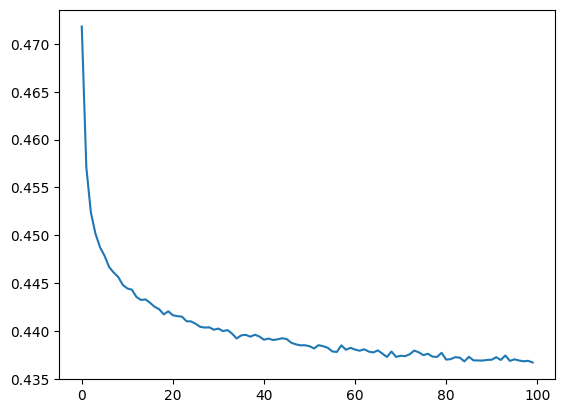

1/1 [==============================] - 0s 136ms/step
0.26876238039315586


In [7]:
plt.plot(history.history["loss"])
plt.show()
z = np.random.uniform(-1, 1, size=(10, Z_DIM))
x = generator.predict(z)
x = encoder.predict(x)
print(np.average((z - x) ** 2))